<a href="https://colab.research.google.com/github/ankush-kp/ankush-k-p/blob/master/Regression_carsdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Setting a default seaborn setting in plots
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(24, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       24 non-null     object 
 1   Year           24 non-null     int64  
 2   Selling_Price  24 non-null     float64
 3   Present_Price  24 non-null     float64
 4   Kms_Driven     24 non-null     int64  
 5   Fuel_Type      24 non-null     object 
 6   Seller_Type    24 non-null     object 
 7   Transmission   24 non-null     object 
 8   Owner          24 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.8+ KB


In [6]:
df.isnull().mean()

,0
Car_Name,0.0
Year,0.0
Selling_Price,0.0
Present_Price,0.0
Kms_Driven,0.0
Fuel_Type,0.0
Seller_Type,0.0
Transmission,0.0
Owner,0.0


In [7]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,24,24.000000,24.000000,24.000000,24.000000,24,24,24,24.0
unique,12,NaN,NaN,NaN,NaN,3,1,2,NaN
top,ciaz,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,6,NaN,NaN,NaN,NaN,13,24,22,NaN
mean,NaN,2014.541667,5.431250,7.740833,30847.833333,NaN,NaN,NaN,0.0
std,NaN,2.283764,2.233043,2.423067,19102.511450,NaN,NaN,NaN,0.0
min,NaN,2009.000000,2.250000,3.460000,2071.000000,NaN,NaN,NaN,0.0
25%,NaN,2014.000000,3.150000,5.680000,17847.000000,NaN,NaN,NaN,0.0
50%,NaN,2015.000000,5.500000,8.065000,34464.500000,NaN,NaN,NaN,0.0
75%,NaN,2016.000000,7.300000,9.835000,43000.000000,NaN,NaN,NaN,0.0


In [8]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,24,24,24,24
unique,12,3,1,2
top,ciaz,Petrol,Dealer,Manual
freq,6,13,24,22


In [9]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer']
['Manual' 'Automatic']
[0]


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

/tmp/ipython-input-1475824536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Year)


<Axes: xlabel='Year', ylabel='Density'>

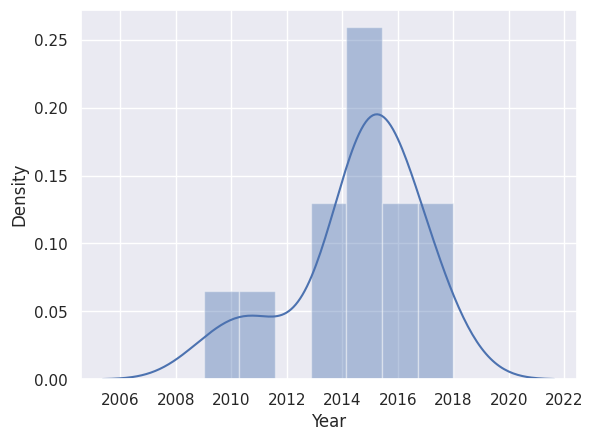

In [11]:
sns.distplot(df.Year)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

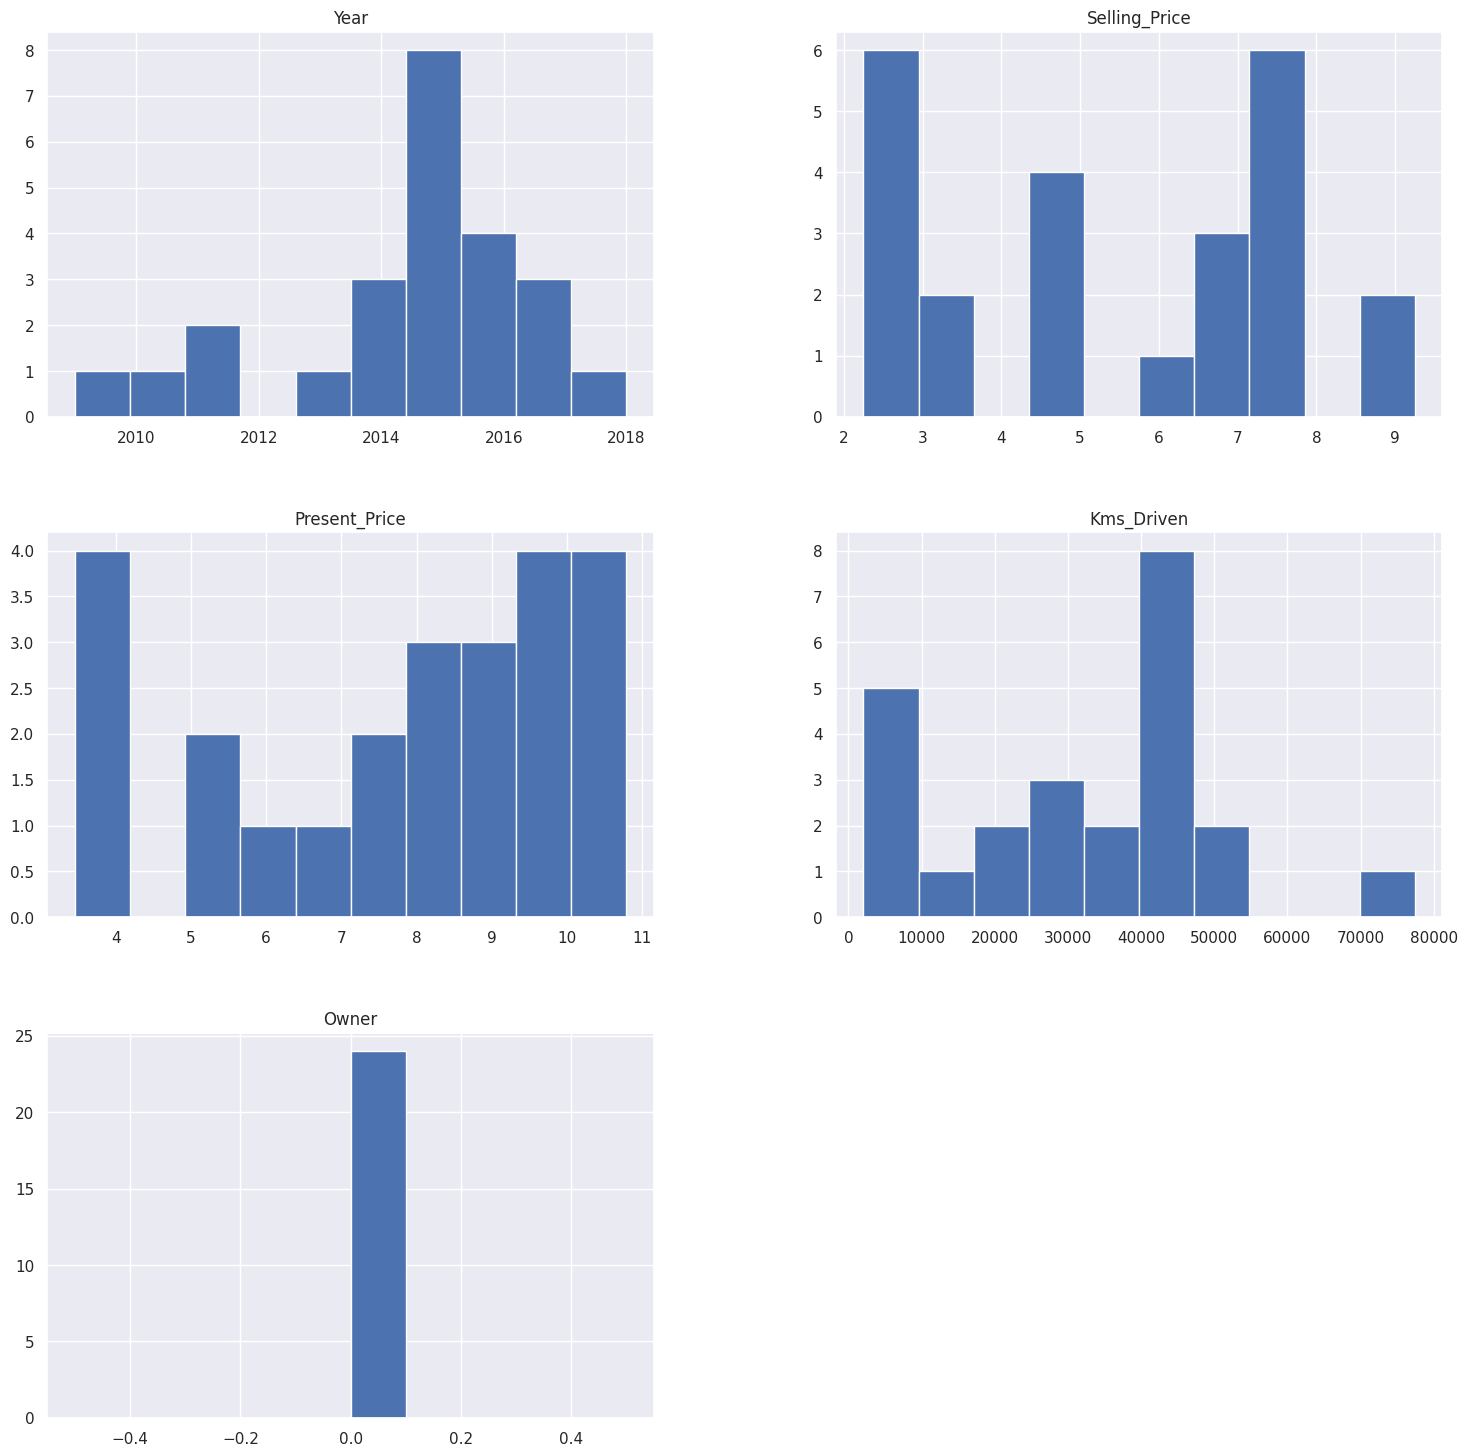

In [12]:
df.hist(figsize=(18,18))

/tmp/ipython-input-2617768958.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seller_Type', y='Selling_Price',data=df,palette='twilight')


<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

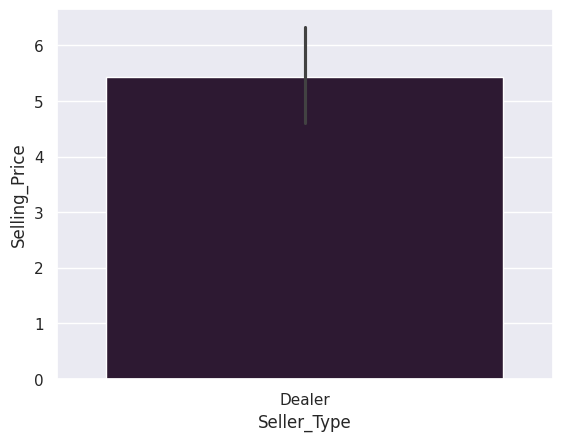

In [13]:
sns.barplot(x='Seller_Type', y='Selling_Price',data=df,palette='twilight')

/tmp/ipython-input-1725234513.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='twilight')


<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

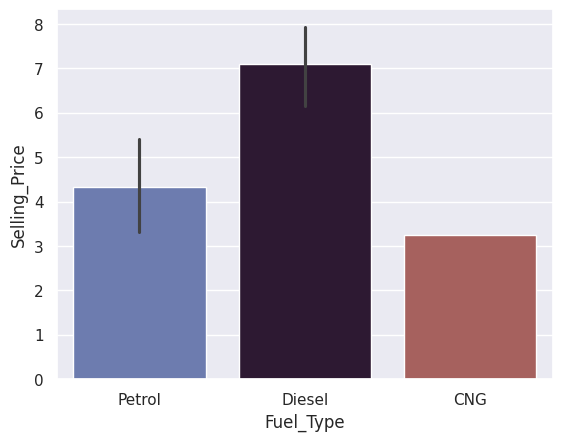

In [14]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='twilight')

<Axes: xlabel='Selling_Price', ylabel='Year'>

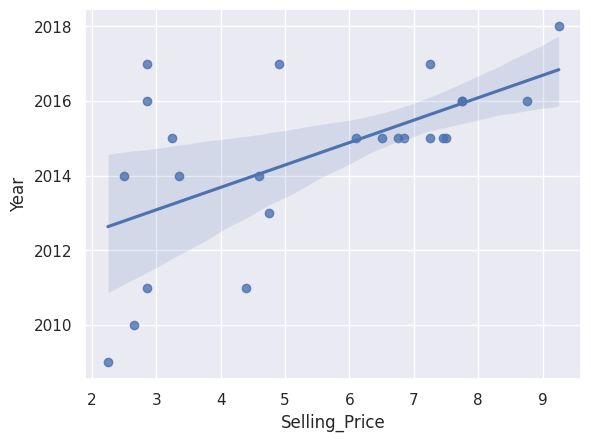

In [16]:
sns.regplot(x='Selling_Price',y='Year',data=df)

<Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>

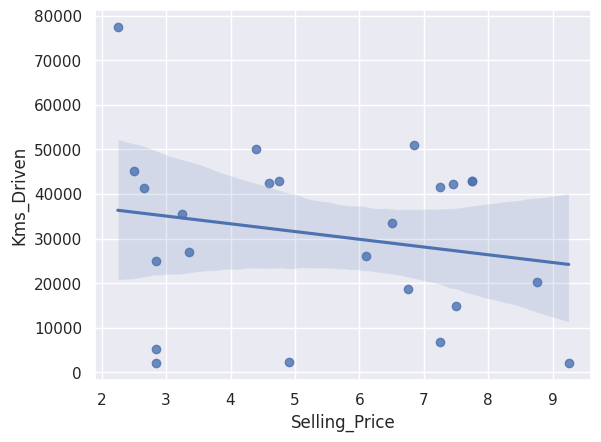

In [18]:
sns.regplot(x='Selling_Price',y='Kms_Driven',data=df)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

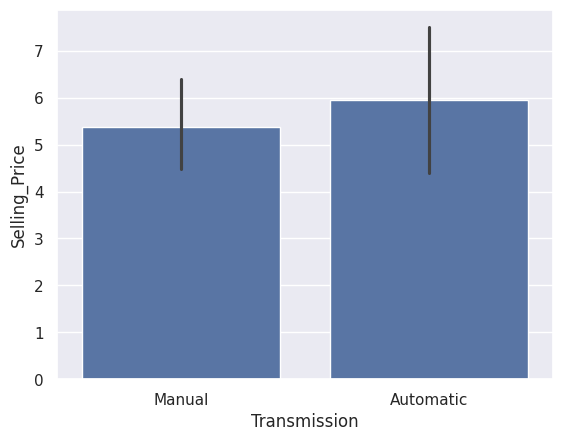

In [20]:
sns.barplot(x='Transmission',y='Selling_Price',data=df)

/tmp/ipython-input-471597317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner',y='Selling_Price',data=df,palette='ocean')


<Axes: xlabel='Owner', ylabel='Selling_Price'>

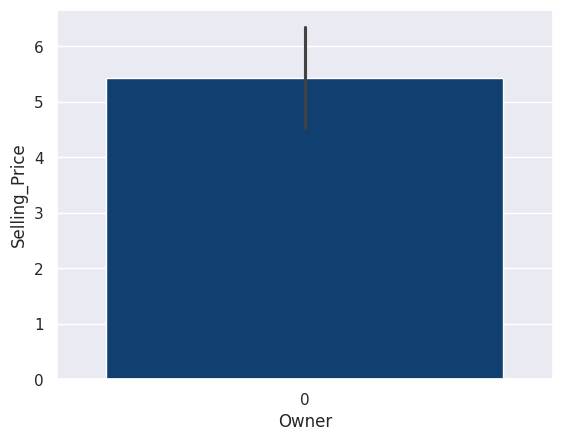

In [21]:
sns.barplot(x='Owner',y='Selling_Price',data=df,palette='ocean')

In [24]:
def plot_categorical(feature , dataset):
  ax=sns.countplot(y=feature,data=dataset)
  plt.title('Distribution of '+ feature)
  plt.xlabel('Count')

  total=len(dataset[feature])
  for p in ax.patches:
    percentage= '{:.1f}%'.format(100 * p.get_width()/total)
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ax.annotate(percentage,(x,y))
  plt.show()

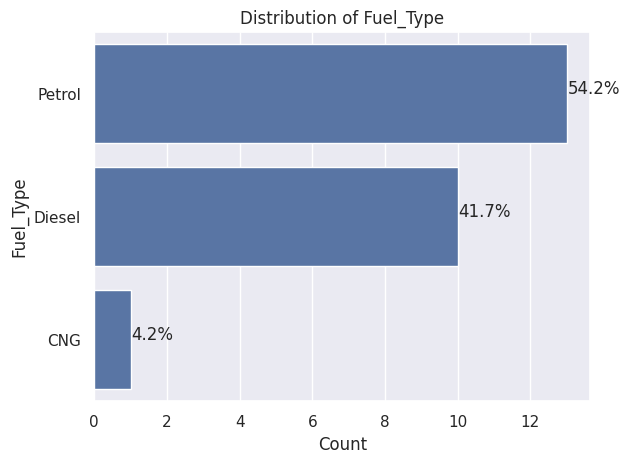

In [25]:
plot_categorical('Fuel_Type',df)

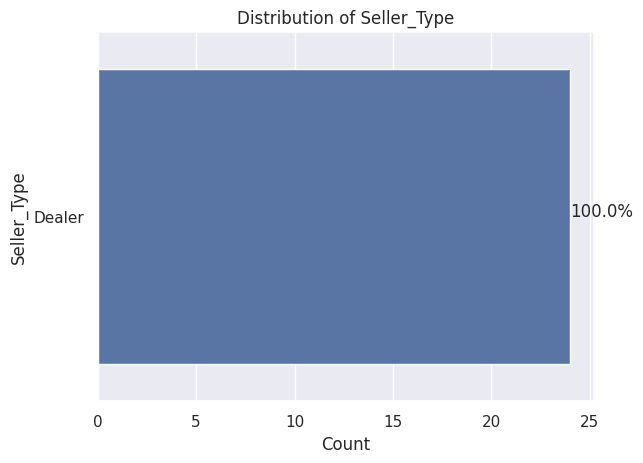

In [26]:
plot_categorical('Seller_Type',df)

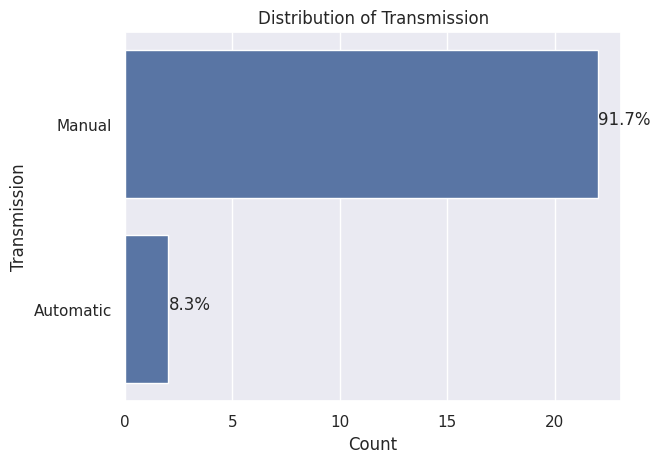

In [27]:
plot_categorical('Transmission',df)